<div>
<img align="center"
src="Images/HT-banner-CONV.png" width="950" height="9500"/>
</div>


## <center> Flujo paralelo sobre placas planas <center/>
    
<div>
<img align="center"
src="Images/Screenshot from 2022-12-06 10-31-05.png" width="500" height="500"/>
</div>


### <center >Método de Blasius para resolver las ecuaciones de capa límite de Prandtl

Para integrar la ecuación de cantidad de movimiento, se usa el método de similaridad.

Se define la función de corriente $\psi$
    
$$u = \dfrac{\partial \psi}{\partial y} \qquad v = \dfrac{\partial \psi}{\partial y}.$$ 

Las variables de similaridad se definen 
    
$$\eta =  y \sqrt{u_\infty/\nu x}$$
    
$$f(\eta) = \dfrac{\psi}{u_\infty \sqrt{\nu x/ u_\infty}}.$$
    
(a) Muestra que en términos de estas variables, las componentes de la velocidad $\mathbf{v}=(u,v)$ y sus derivadas son

$$u = u_\infty \dfrac{df}{d\eta},\qquad  v = \dfrac{1}{2} \sqrt{\dfrac{\nu u_\infty}{x}} \left(\eta \dfrac{df}{d\eta} -f\right),\qquad  \dfrac{\partial u}{\partial x}= - \dfrac{u_\infty}{2x}\eta \dfrac{d^2 f}{d \eta^2}, \qquad  \dfrac{\partial u}{\partial y}= u_\infty \sqrt{\dfrac{u_\infty}{\nu x}} \dfrac{d^2 f}{d \eta^2},\qquad  \dfrac{\partial^2 u}{\partial y^2}= \dfrac{{u_\infty}^2}{\nu x} \dfrac{d^3 f}{d \eta^3}.$$
        

Sustituyendo las expresiones anteriores en la ecuación de conservación obtenemos una ecuación diferencial ordinaria de tercer orden nolineal para la función de conrriente en función de $\eta$ dada por

$$2 \dfrac{d^3 f}{d \eta ^3} +  f \dfrac{d^2 f}{d \eta^2} =0.$$
    
Para fines de la integración numérica reescribimos la ecuación anterior como

$$f'''+ \dfrac{1}{2} f f''=0.\quad (1)$$

Las condiciones de frontera en términos de variables de similitud son

$$\dfrac{df}{d \eta} \Big|_{\eta=0} = f(0)= 0, \qquad \dfrac{df}{d\eta} \Big{|}_{\eta=\infty}  = 1.$$
La solución de la ecuación (1) con las condiciones de frontera mencionadas, se obtiene mediante una expansión en serie o por integración numérica. En lo que sigue convertimos estas ecuaciones a un sistema de ecuaciones diferenciales de primer orden 

$$f_1=f$$
$$f_2=f_1'$$
$$f_3=f_2'$$
$$f_3'=- \dfrac{1}{2} f_1f_3$$


(b) Realiza la solución numérica y calcula las componentes de la velocidad con $u_{\infty}=0.01$, $\nu = 1.79x10^-6$.

(c) Grafica $u(y)$ y $v(y)$ para $x = 0.01$, $x=0.1$ y $x=1$ e interpreta tus resultados.
    
(d) Calcula la velocidad al borde de la capa límite y muestra que la velocidad axial en el borde de la capa límite  $u \approx 0.99 u_{\infty}$, con $\eta=5.0$. Sustituimos este valor en la ecuación

$$\eta = \dfrac{y}{\sqrt{u_{\infty}/\nu x}}.$$

De lo anterior, se define el espesor de la capa límite $\delta$ como el valor de $y$ para el que $u \approx 0.99 u_{\infty}$, esto es

$$\delta= \dfrac{5.0}{\sqrt{u_{\infty}/\nu x}}= \dfrac{5x}{\sqrt{Re_x}}$$

(d) Grafica el campo de velocidades y el espesor de la capa límite $\delta$.

Una vez que conocemos la velocidad axial como función de la coordenada vertical $u(y)$, o equivalentemente, la función de corriente f como función de la coordenada de similaridad η, podemos calcular el esfuerzo cortante, esto es la fuerza que hace el fluido sobre la placa (o viceversa) invocando la definición de esfuerzo cortante para un fluido newtoniano:

$$\tau_s = \mu \dfrac{\partial u}{\partial y}\Big{|}_{y=0}= \mu u_{\infty}\sqrt{u_{\infty}/\nu x} \dfrac{d^2 f}{d \eta^2}\Big{|}_{\eta=0} = 0.332 u_{\infty} \sqrt{\rho \mu u_{\infty}/ x} $$

El coeficiente local de fricción 

$$C_{f,x}= \dfrac{\tau_{s,x}}{\rho u^2_{\infty}/2}= 0.664 {Re_x}^{-1/2} $$



(e) Calcular, graficar y explicar $\tau_s$ y $C_{f,x}$.



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from macti.evaluacion import Evalua
evaluacion = Evalua("../../utils/data/solutions", local=True)

In [40]:
#definir parámetros
ui  = 0.01
nu  = 0.00000179
x1  = 0.01
x2  = 0.1
x3  = 1 
ETA = 35
eta = np.linspace(0,7,ETA)

In [73]:
# (b) Realiza la solución numérica y calcula las componentes de la velocidad

def blas(f,t):
    return (f[1],f[2],-0.5*f[0]*f[2])

f0  = [0,0,0.332]
f   = odeint(blas,f0,eta)

#Crea data frame
bl    = pd.DataFrame(data={"n": np.round(eta,4), "f": f[:,0], "dfdn": f[:,1],"dfdn2": f[:,2]})
n     = bl.n
f     = bl.f
dfdn  = bl.dfdn
dfdn2 = bl.dfdn2

In [74]:
def vel(x,y,eta,f,dfdn):
    u = ui*dfdn
    v = (1/2.)*np.sqrt((nu*ui)/x)*((eta*dfdn)-f)
    return u,v

x = np.linspace(0.001,0.01,len(bl))
y = np.linspace(0.001,0.01,len(bl))

In [75]:
evaluacion.verifica(np.array(vel(x,y,eta,f,dfdn)),16)

¡Tu resultado es correcto!


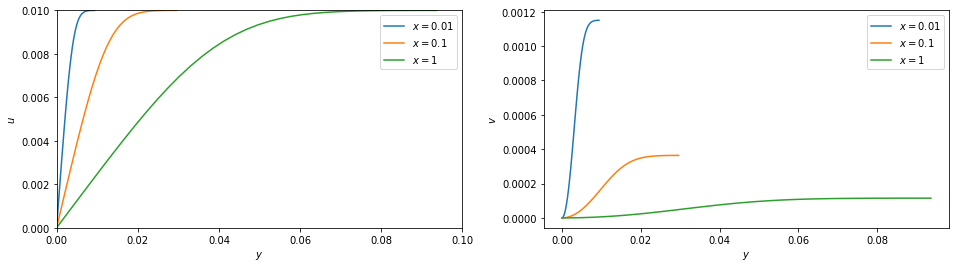

In [90]:
#(c) Grafica u(y) y v(y) para x = 0.01, x=0.1 y x=1.
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

y1    = eta/np.sqrt(ui/(nu*x1))
y2    = eta/np.sqrt(ui/(nu*x2))
y3    = eta/np.sqrt(ui/(nu*x3))

u1,v1 = vel(x1,y1,eta,f,dfdn)
u2,v2 = vel(x2,y2,eta,f,dfdn)
u3,v3 = vel(x3,y3,eta,f,dfdn)

ax1.plot(y1,u1,label="$x=0.01$")
ax1.plot(y2,u2,label="$x=0.1$")
ax1.plot(y3,u3,label="$x=1$")
ax1.set_xlabel("$y$")
ax1.set_ylabel("$u$")
ax1.set_xlim(0,0.1)
ax1.set_ylim(0,0.01)
ax1.legend()

ax2.plot(y1,v1,label="$x=0.01$")
ax2.plot(y2,v2,label="$x=0.1$")
ax2.plot(y3,v3,label="$x=1$")
ax2.set_xlabel("$y$")
ax2.set_ylabel("$v$")
#ax2.set_ylim(0,0.011)
ax2.legend()



plt.show()

In [77]:
bl

,n,f,dfdn,dfdn2
0,0.0000,0.000000,0.000000,0.332000
1,0.2059,0.007036,0.068349,0.331920
2,0.4118,0.028140,0.136640,0.331359
3,0.6176,0.063286,0.204725,0.329843
4,0.8235,0.112408,0.272361,0.326913
5,1.0294,0.175381,0.339210,0.322144
6,1.2353,0.252000,0.404857,0.315172
7,1.4412,0.341971,0.468816,0.305717
8,1.6471,0.444890,0.530558,0.293615
9,1.8529,0.560246,0.589533,0.278840


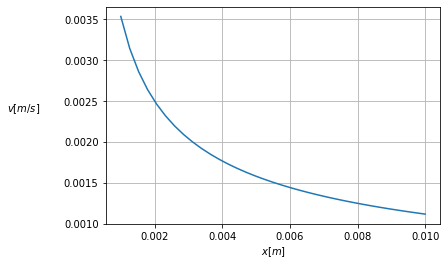

In [92]:
#La velocidad transversal en el borde de la capa límite es 


u,v = vel(x,y,n[24],f[24],dfdn[24])

plt.plot(x,v)
plt.grid()
plt.ylabel("$v[m/s]$",rotation=0,labelpad=40)
plt.xlabel("$x[m]$")
plt.show()

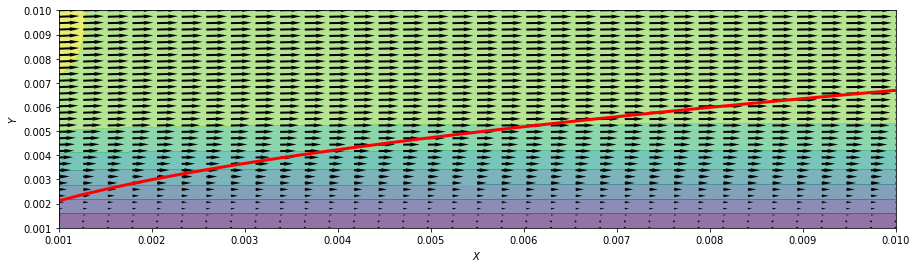

In [69]:
#(d) Grafica el campo de velocidades y el espesor de la capa límite.

Y,X    = np.meshgrid(x,y)
n      = np.full((len(bl),len(bl)),eta)
dfdeta = np.full((len(bl),len(bl)),dfdn)
efe    = np.full((len(bl),len(bl)),f)

delta  = (5)/np.sqrt(ui/(nu*x))

u,v    = vel(X,Y,n,efe,dfdeta)


M = np.sqrt(u*u+v*v) # magnitude

plt.figure(figsize=(15,4))
plt.contourf(X, Y,M,cmap=plt.cm.viridis,alpha=0.6)
plt.quiver(X, Y, 10*u,v, scale=4,headwidth=2)
plt.plot(x,delta,'red',linewidth=3)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.xlim(0.001,0.01)
plt.ylim(0.001,0.01)
plt.show()